#UCI Heart Disease Dataset:

**Context**

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to 
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.



**Acknowledgements**

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas_profiling as pp

In [2]:
df = pd.read_csv('/content/heart-disease.csv')

In [3]:
pp.ProfileReport(df)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


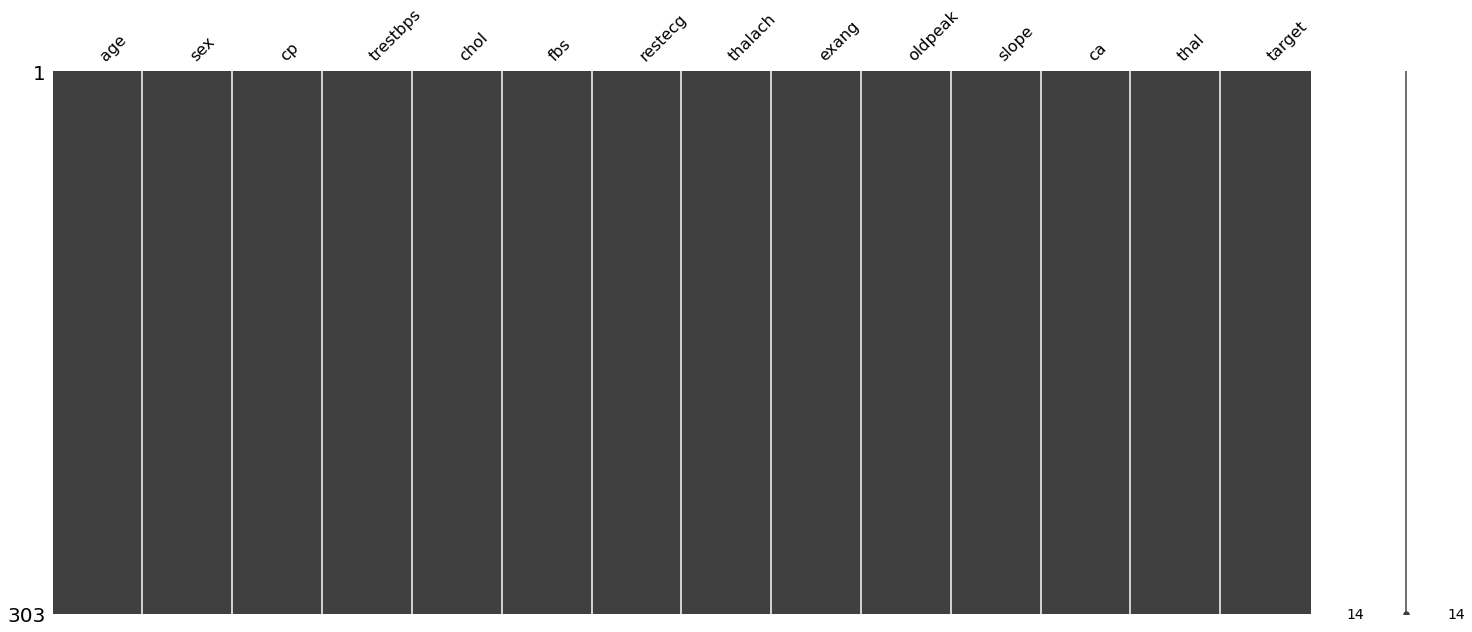

In [6]:
msno.matrix(df)
#no missing values

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    165
0    138
Name: target, dtype: int64

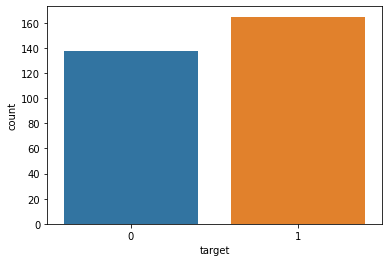

In [7]:
sns.countplot(df.target)
df.target.value_counts()

In [8]:
#Renaming the columns for better understanding
df.rename (columns = {
    'cp':'chest_pain',
    'trestbps':'blood_pressure',
    'chol':'cholesterol',
    'fbs':'blood_sugar',
    'restecg':'rest_ecg',
    'thalach':'heart_rate',
    'exang':'exercise_angina',
    'oldpeak':'st_peak',
    'slope':'st_slope',
    'ca':'n_vessels',
    'thal':'thallium',
    'target':'heart_disease'}, inplace = True)

In [9]:
df.sex.replace({
    0: 'woman',
    1: 'man'}, inplace=True)
df.chest_pain.replace({
    1: 'typical',
    2: 'atypical',
    3: 'non-anginal',
    0: 'none'}, inplace=True)
df.blood_sugar.replace({
    0: 'normal',
    1: 'high'}, inplace=True)
df.rest_ecg.replace({
    1: 'normal',
    2: 'wave-abnormal',
    0: 'lv-hyperthrophy'}, inplace=True)
df.exercise_angina.replace({
    0: 'no',
    1: 'yes'}, inplace=True)
df.st_slope.replace({
    2: 'increasing',
    1: 'flat',
    0: 'decreasing'}, inplace=True)
df.thallium.replace({
    0: float('nan'), # 0 is not a valid value
    2: 'normal',
    1: 'fixed',
    3: 'reversable'}, inplace=True)
df.heart_disease.replace({
    0: 'yes',
    1: 'no'}, inplace=True)

In [10]:
df.mode()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,rest_ecg,heart_rate,exercise_angina,st_peak,st_slope,n_vessels,thallium,heart_disease
0,58.0,man,none,120.0,197,normal,normal,162.0,no,0.0,increasing,0.0,normal,no
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.mode().iloc[0]

age                        58
sex                       man
chest_pain               none
blood_pressure            120
cholesterol               197
blood_sugar            normal
rest_ecg               normal
heart_rate                162
exercise_angina            no
st_peak                     0
st_slope           increasing
n_vessels                   0
thallium               normal
heart_disease              no
Name: 0, dtype: object

In [12]:
df.fillna(df.mode().iloc[0], inplace=True)

In [13]:
categoricals = ['sex', 'chest_pain', 'blood_sugar', 'rest_ecg', 'exercise_angina',
                'st_slope', 'thallium', 'heart_disease', 'n_vessels']
numericals = ['age', 'blood_pressure', 'cholesterol', 'heart_rate', 'st_peak']

In [14]:
for col in categoricals:
    df[col] = df[col].astype('category')


In [15]:
categoricals = [c for c in categoricals if c != 'heart_disease']

In [16]:
col_order = numericals + categoricals + ['heart_disease']

In [17]:
df = df.loc[:, col_order]

In [18]:
label = 'heart_disease'
features = [col for col in df.columns if col != label]

In [19]:
X = df[features]
y = df[label] 

In [20]:
X.columns

Index(['age', 'blood_pressure', 'cholesterol', 'heart_rate', 'st_peak', 'sex',
       'chest_pain', 'blood_sugar', 'rest_ecg', 'exercise_angina', 'st_slope',
       'thallium', 'n_vessels'],
      dtype='object')

In [21]:
y = y.replace({'no': 0, 'yes': 1})

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle = True, test_size = .2, random_state = 0)

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [24]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

In [25]:
transformer = ColumnTransformer(transformers=[
    ('numerical', StandardScaler(), numericals),
    ('categorical', OneHotEncoder(drop='first'), categoricals)
])

In [26]:
tree = make_pipeline(
    transformer,
    GridSearchCV(
        estimator=DecisionTreeClassifier(random_state=0),
        cv=kfold,
        param_grid={
            'criterion': ['gini', 'entropy'],
            'max_depth': [3, 5, 10, 20],
            'min_samples_split': [.001, .01, .1],
            'min_samples_leaf': [.001, .01, .1]
        },
        n_jobs=4,
        verbose=1,
        scoring='recall'
    )
)

In [27]:
tree.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 200 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:    2.4s finished


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'blood_pressure',
                                                   'cholesterol', 'heart_rate',
                                                   'st_peak']),
                                                 ('categorical',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
         

In [28]:
tree[-1].best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.001, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [29]:
prediction = tree.predict(X_test)

In [30]:
print("Accuracy score on the test set:", accuracy_score(y_test,prediction))

Accuracy score on the test set: 0.819672131147541


Text(0.5, 1.0, 'Confusion Matrix')

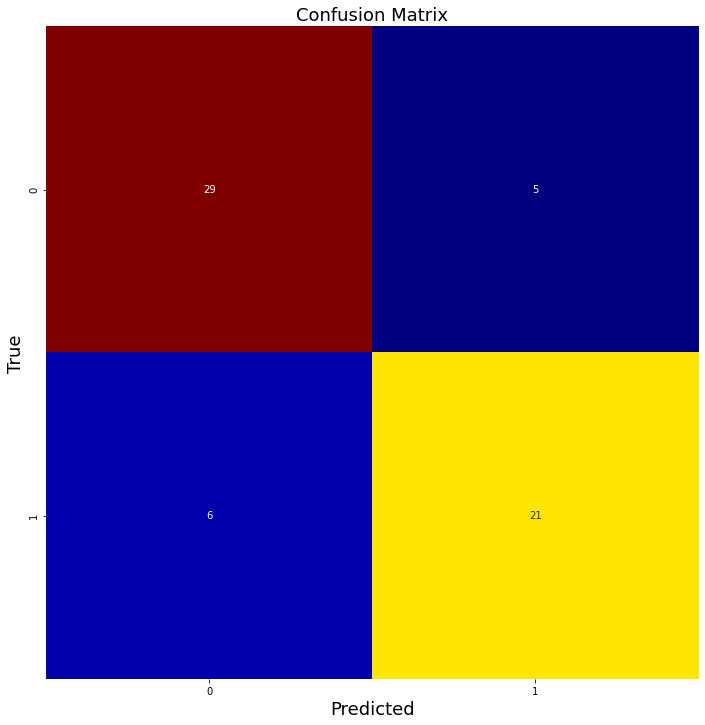

In [31]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test, prediction), cmap=plt.cm.jet,square = True, annot=True, cbar=False, ax=ax)
ax.set_xlabel('Predicted', fontsize=18)
ax.set_ylabel('True', fontsize=18)
ax.set_title('Confusion Matrix', fontsize=18)

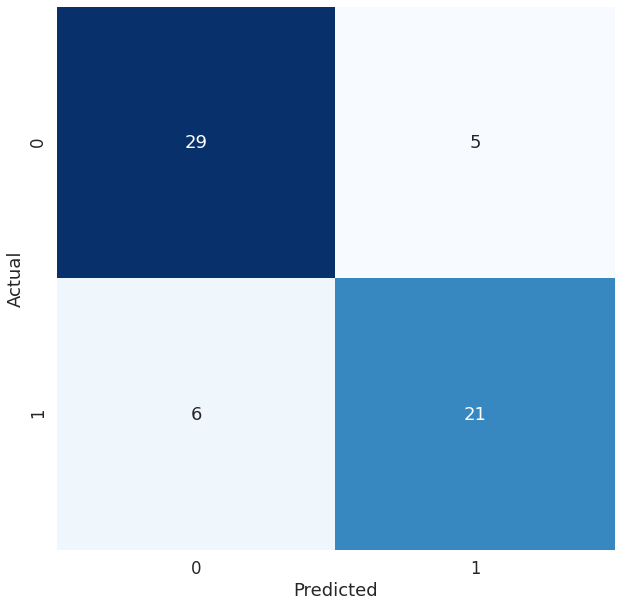

In [32]:
data = confusion_matrix(y_test, prediction)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(prediction))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sns.set(font_scale=1.5)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True, cbar = False)

In [33]:
pip install scikit-plot

In [34]:
import scikitplot as skplt

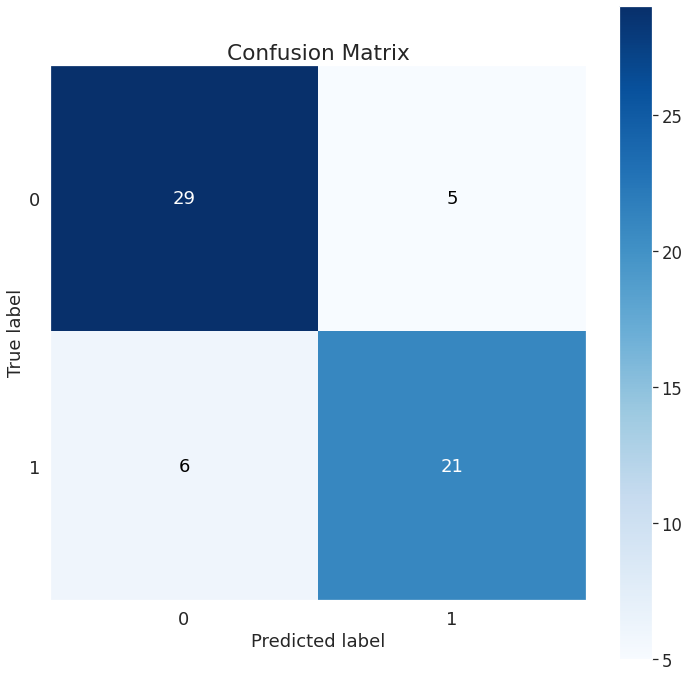

In [35]:
skplt.metrics.plot_confusion_matrix(
    y_test,
    prediction,
    figsize = (12,12)
)

In [36]:
from sklearn.tree import plot_tree

In [37]:
ohe = tree[0].transformers_[1][1]

In [38]:
feature_names = numericals + list(ohe.get_feature_names(input_features = categoricals))

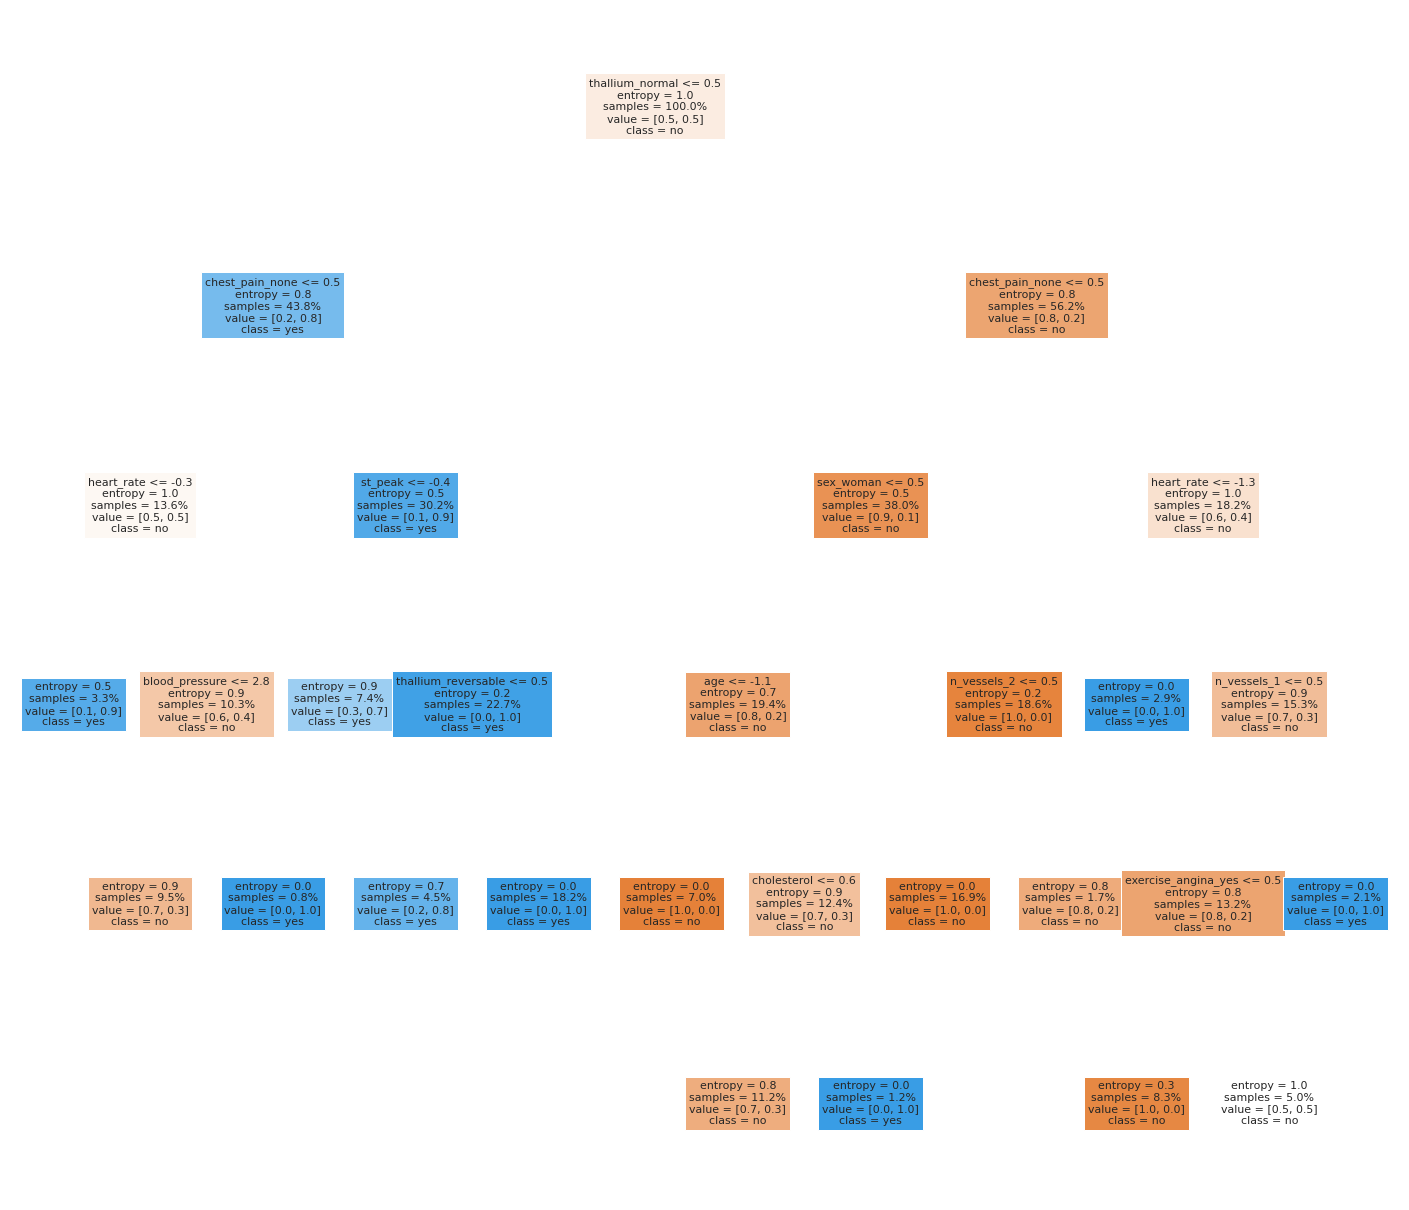

In [39]:
fig, ax = plt.subplots(figsize=(25,22))
plot_tree(tree[-1].best_estimator_, max_depth=5, feature_names=feature_names, class_names=['no', 'yes'], label='all', filled=True, rounded=False, proportion=True, precision=1, fontsize=11, ax=ax);

In [40]:
feature_importance = tree[-1].best_estimator_.feature_importances_

In [41]:
for fi, fn in sorted(zip(feature_importance, feature_names), reverse=True):
    if fi > 0:
        print(f"Feature {fn}: importance = {fi:.3f}")

Feature thallium_normal: importance = 0.361
Feature chest_pain_none: importance = 0.173
Feature heart_rate: importance = 0.100
Feature n_vessels_1: importance = 0.063
Feature age: importance = 0.051
Feature st_peak: importance = 0.050
Feature sex_woman: importance = 0.044
Feature exercise_angina_yes: importance = 0.044
Feature cholesterol: importance = 0.035
Feature thallium_reversable: importance = 0.033
Feature n_vessels_2: importance = 0.025
Feature blood_pressure: importance = 0.021


In [42]:
sum(feature_importance)

1.0000000000000002